### Distribution : 
1. Normal Distr
2. Standard Normal Distr
3. Z score
4. Log Normal Distr
5. Bernaullis Distr
6. Binomial Distr

### Practical : 
1. Mean, Median, Mode
2. Variance, SD
3. Histogram, pdf, Bar plot, Violen plot
4. IQR
5. Log Normal Distr

#### What is distribution ? 
- A distribution in statistics is a function that shows the possible values for a variable and how often they occur. 
1. Normal Distr / Gaussion Distr : In a normal distribution graph, data is symmetrically distributed with no skew. When plotted, the data follows a bell shape, with most values clustering around a central region and tapering off as they go further away from the center.
![image.png](attachment:image.png)
- Some of the characteristics which can help us to recognize a normal distribution are:

      - The curve is symmetric at the center. Therefore mean, mode, and median are equal to the same value, distributing all the values symmetrically around the mean.
      - The area under the distribution curve equals 1 (all the probabilities must sum up to 1).
      
- While plotting a graph for a normal distribution, 68% of all values lie within one standard deviation from the mean. In the example above, if the mean is 70 and the standard deviation is 10, 68% of the values will lie between 60 and 80. Similarly, 95% of the values lie within two standard deviations from the mean, and 99.7% lie within three standard deviations from the mean. This last interval captures almost all matters. If a data point is not included, it is most likely an outlier.
![image-2.png](attachment:image-2.png)


- Z-Score : It indicates how many standard deviations a data point is from the mean of the distribution. Z-score tells how many standard deviations a data point is from the mean: 0 = mean, positive = above mean, negative = below mean.

           Z score = ( x - μ ) / σ
       Where:
       z = Z-score
       x = the value being evaluated
       μ = the mean
       σ = the standard deviation
       
* You use z-scores in statistics for several key reasons:

        1. Identifying outliers: A z-score tells you how many standard deviations a data point is away from the mean. Scores far from 0 (typically beyond +/- 3 standard deviations) are considered outliers and might warrant further investigation.

        2. Comparing data across different variables: Z-scores put data on a standard scale, allowing you to compare values from different datasets, even if they originally had different units or scales. This is like comparing "apples to oranges" in statistics.

        3. Hypothesis testing: Z-scores play a role in hypothesis testing by helping determine if a data point deviates significantly from what's expected by chance. This is useful for assessing the validity of claims or relationships in your data.

        4. Working with normal distributions: Z-scores are particularly useful when dealing with data that follows a normal distribution (bell-shaped curve). They allow you to calculate probabilities associated with specific data points within the distribution.

### Difference between normal distribution and standard normal distribution : 
- Normal distributions and standard normal distributions are both bell-shaped curves, but with a key difference:

- Regular normal distribution: This can have any mean (center) and standard deviation (spread). Imagine a bell curve that can slide left or right (mean) and stretch or shrink (standard deviation).
- Standard normal distribution: This is a specific normal distribution with a mean of 0 and a standard deviation of 1. It's like a fixed template for normal distributions.
- In essence, any normal distribution can be transformed into a standard normal distribution by subtracting the mean and then dividing by the standard deviation. This process is called standardization.

### Standard Normal Distribution :
- The standard normal distribution, also called the z-distribution, is a special normal distribution where the mean is 0 and the standard deviation is 1.
- Any normal distribution can be standardized by converting its values into z scores. Z scores tell you how many standard deviations from the mean each value lies.
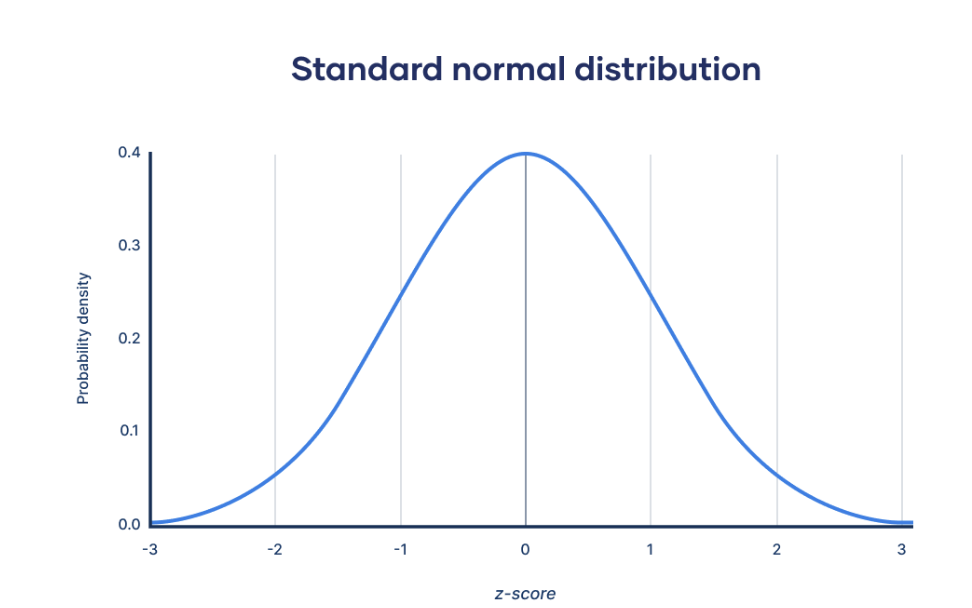

- In a given dataset if we want the values between 0-1, we use normalization(keeping the values between the range of upper bound and lower bound) and this can be done using MinMax Scaler.      Min-Max Scaler is a technique used for data normalization in machine learning. It transforms your data points from their original scale to a new, defined range. This helps machine learning models focus on the relative positions of data points rather than their absolute values.

### Some Practical Implementation : 

In [1]:
import seaborn as sb
import numpy as np
import statistics
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# compute mean, median and mode
df=sb.load_dataset('tips')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
np.mean(df['total_bill'])

19.78594262295082

In [5]:
np.median(df['total_bill'])

17.795

In [6]:
statistics.mode(df['total_bill'])

13.42

<Axes: >

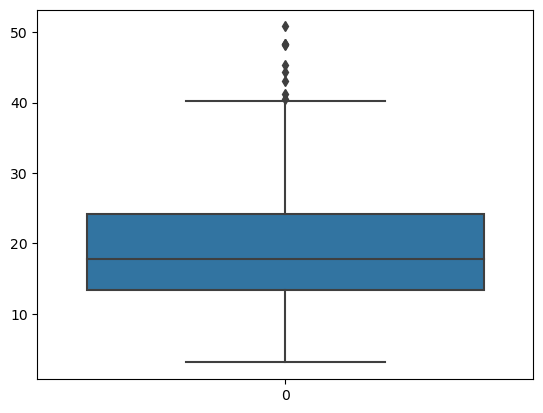

In [7]:
sb.boxplot(df['total_bill'])

<Axes: xlabel='total_bill', ylabel='Count'>

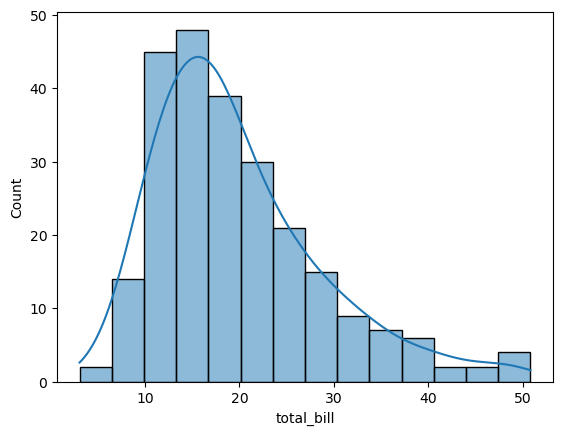

In [8]:
sb.histplot(df['total_bill'], kde=True)

In [9]:
df1=sb.load_dataset('iris')
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Count'>

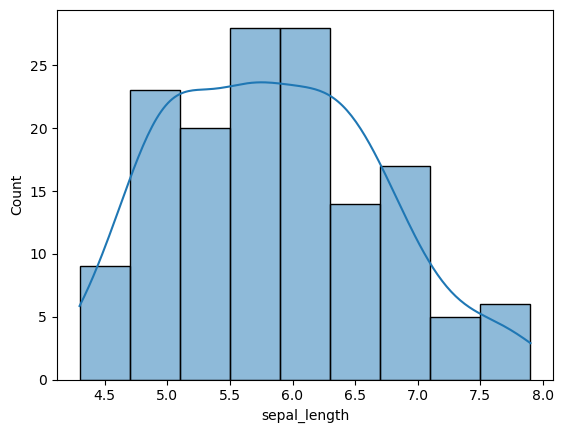

In [10]:
sb.histplot(df1['sepal_length'], kde=True)

<Axes: xlabel='sepal_width', ylabel='Count'>

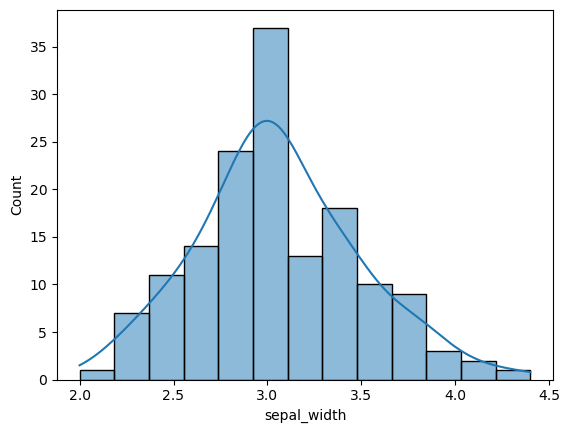

In [11]:
sb.histplot(df1['sepal_width'], kde=True) 
# this follows the gaussian distribution

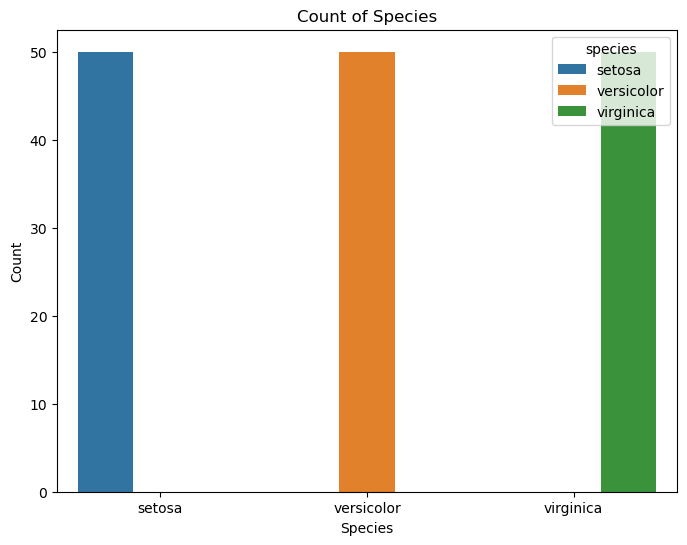

In [12]:
plt.figure(figsize=(8, 6))
sb.countplot(x='species', data=df1, hue='species')
plt.title('Count of Species')
plt.xlabel('Species')
plt.ylabel('Count')
plt.show()

In [13]:
np.percentile(df1['sepal_length'], [25,75])

array([5.1, 6.4])

### Outliers : 

In [14]:
## Define our dataset
dataset= [11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

(array([31.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.]),
 array([ 10. ,  19.8,  29.6,  39.4,  49.2,  59. ,  68.8,  78.6,  88.4,
         98.2, 108. ]),
 <BarContainer object of 10 artists>)

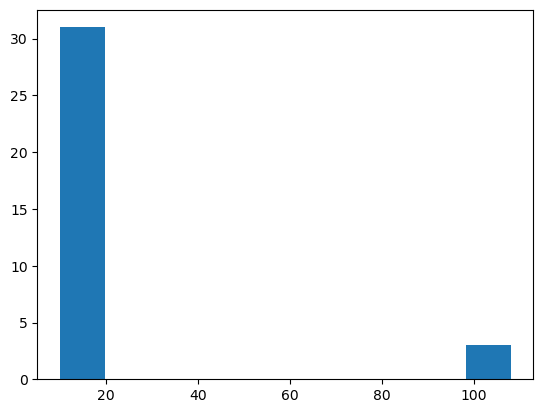

In [15]:
plt.hist(dataset)

In [16]:
## Z Score
outliers=[]

def detect_outliers(data):
  threshold=3 ## 3 std deviation
  mean=np.mean(data)
  std=np.std(data)

# using the z score formula
  for i in data:
    z_score=(i-mean)/std
    if np.abs(z_score)> threshold:
      outliers.append(i)

  return outliers



In [17]:
detect_outliers(dataset)

[102, 107, 108]

### IQR Steps : 
1. Sort the data
2. Calculate Q1 aqnd Q3
3. IQR(Q3-Q1)
4. Find the Lower fence(q1-1.5(iqr))
5. Find the upper fence(q3+1.5(iqr))

In [18]:
dataset=sorted(dataset)
dataset
# step 1

[10,
 10,
 10,
 10,
 10,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 15,
 15,
 15,
 15,
 15,
 17,
 19,
 102,
 107,
 108]

In [19]:
q1,q3=np.percentile(dataset,[28,72])
# step 2 (percentile nikal rha hi 25 n 75)

In [20]:
print(q1, q3)

12.0 14.759999999999998


In [21]:
iqr=q3-q1
print(iqr)
# step 3

2.759999999999998


In [22]:
## Find the lower fence and higher fence
lower_fence=q1-(1.5*iqr)
higher_fence=q3+(1.5* iqr)
# step 4 & 5

In [23]:
print(lower_fence,higher_fence)

7.860000000000003 18.899999999999995


#### Explaination of the code-lines above : 
1. Finding the Middle Quartiles (q1 and q3):

- The code first finds two important values, q1 and q3. These are like dividing lines that split your data into four equal groups, kind of like quartiles in a race.
- q1 represents the middle number between the lowest scores and the center of the data.
- q3 represents the middle number between the center of the data and the highest scores.

2. Calculating the Spread (IQR):

- The code then calculates a value called the interquartile range (IQR). This tells you how spread out the middle half of your data is.
- It's simply the difference between q3 (the upper middle) and q1 (the lower middle). A larger IQR indicates that the data in the middle is more spread out, and a smaller IQR indicates the data points are closer together.

3. Identifying Outliers (fences):

- The code defines fences to identify outliers, which are data points that fall significantly away from the rest.
- It calculates a lower fence as q1 minus 1.5 times the IQR.
- It calculates a higher fence as q3 plus 1.5 times the IQR.
- Any data points that fall below the lower fence or above the higher fence are considered outliers because they are quite far from the majority of the scores.

#### In simpler terms, imagine the data is like a boxplot:

- The quartiles (q1 and q3) mark the edges of the box, and the IQR represents the height of the box.
- The fences extend outward from the box by a distance of 1.5 times the IQR.
- Any data points that fall outside the fences are likely outliers because they are significantly far from the rest of the data.

<Axes: >

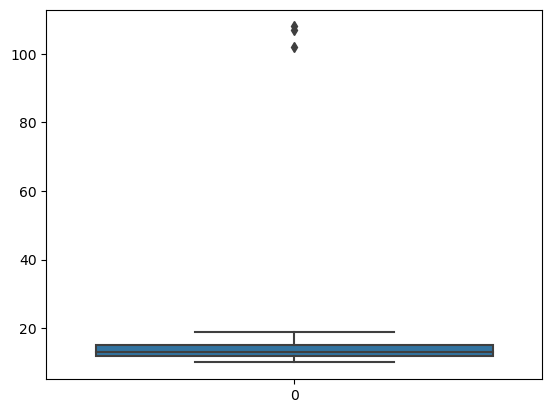

In [24]:
sb.boxplot(dataset)

In [25]:
# removing the outliers
newData=[]
for i in dataset:
    if i>7.86 and i<18.90:
        newData.append(i)
print(newData)

[10, 10, 10, 10, 10, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 17]


(array([5., 2., 7., 0., 4., 6., 0., 5., 0., 1.]),
 array([10. , 10.7, 11.4, 12.1, 12.8, 13.5, 14.2, 14.9, 15.6, 16.3, 17. ]),
 <BarContainer object of 10 artists>)

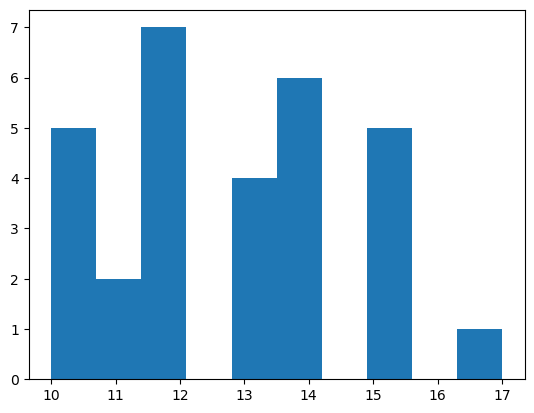

In [26]:
plt.hist(newData)

<Axes: >

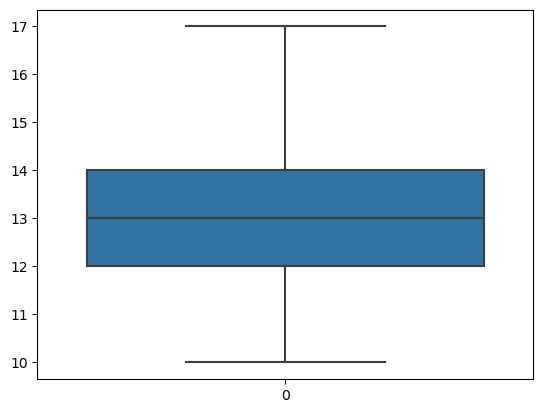

In [27]:
sb.boxplot(newData)